<a href="https://colab.research.google.com/github/claudioldc/MBA/blob/main/Exerc%C3%ADcioTeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regressão Linear

#Importando as Bibliotecas


In [ ]:
import pandas as pd # Trabalhar com as tabelas e importação dos arquivos utilizados
import plotly.express as px # biblioteca para criar gráficos dinâmicos
import seaborn as sns # biblioteca para gráficos
import numpy as np # funções matemáticas de alto nível


In [ ]:
base_custo_diaria = pd.read_csv('base_custo_diaria.csv', sep= ';')


In [ ]:
base_custo_diaria.head(15)

,qtd_pessoas,valor_diaria
0,1,150
1,3,200
2,4,650
3,6,499
4,7,549
5,10,980
6,12,700
7,13,735
8,15,859
9,16,900


In [ ]:
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


Criando Variáveis que serão utilizadas no modelo

*   Item da lista
*   Item da lista



> Bloco com recuo




In [ ]:
#Variável Independente
x_custo_diaria = base_custo_diaria.iloc[:15,0].values #Buscamos todos os registros da primeira coluna e colocamos no formato de array
#o comando iloc permite selecionar um conjunto de registros. Os : significa que estamos selecionando todos os registros e "0", a primeira coluna.
x_custo_diaria

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25])

In [ ]:
#criando variável dependente (o que queremos predizer)
y_custo_diaria = base_custo_diaria.iloc[:15,1].values
y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500])

In [ ]:
np.corrcoef(x_custo_diaria,y_custo_diaria) #mostra uma matriz

array([[1.        , 0.93319425],
       [0.93319425, 1.        ]])

<Axes: >

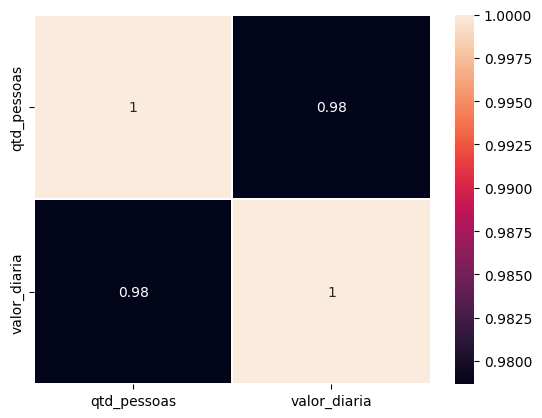

In [ ]:
correlation = base_custo_diaria.corr()
#plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, linewidths=.3)
plot

Tratando os dados para o modelo

In [ ]:
#Visualizar o formato da variável
x_custo_diaria.shape #

(15,)

In [ ]:
#Visualizando a variável x_custo_diaria
x_custo_diaria # O resultado mostra que temos uma array com apenas uma coluna/dimensão. Precisamos ter uma matriz com duas colunas


array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25])

In [ ]:
x_custo_diaria = x_custo_diaria.reshape(-1,1)
x_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25]])

In [ ]:
#Agora temos uma matriz com duas colunas. 10 linhas e uma coluna
x_custo_diaria.shape

(15, 1)

Aplicando os dados ao algoritmo machine learning

In [ ]:
from sklearn.linear_model import LinearRegression
#Cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [ ]:
type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

Realizando o Treinamento do Modelo

In [ ]:
previsao_custo_diaria.fit(x_custo_diaria,y_custo_diaria)

LinearRegression()

In [ ]:
#Verificando a Interceptação
previsao_custo_diaria.intercept_

216.95937500000002

In [ ]:
#Verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([46.203125])

In [ ]:
previsao_precos = previsao_custo_diaria.predict(x_custo_diaria) #Baseado no número de pessoas vamos estimar/prever o custo do imóvel alugado
previsao_precos

array([ 263.1625  ,  355.56875 ,  401.771875,  494.178125,  540.38125 ,
        678.990625,  771.396875,  817.6     ,  910.00625 ,  956.209375,
       1141.021875, 1048.615625, 1233.428125, 1279.63125 , 1372.0375  ])

In [ ]:
#Verificando o tipo da variável x_custo_diaria
x_custo_diaria

array([[ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [15],
       [16],
       [20],
       [18],
       [22],
       [23],
       [25]])

In [ ]:
x_custo_diaria.ravel() #transforma em um vetor

array([ 1,  3,  4,  6,  7, 10, 12, 13, 15, 16, 20, 18, 22, 23, 25])

In [ ]:
y_custo_diaria

array([ 150,  200,  650,  499,  549,  980,  700,  735,  859,  900, 1100,
        989, 1075, 1378, 1500])

In [ ]:
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [ ]:
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = x_custo_diaria.ravel(), y = previsao_precos, name = 'previsoes')
grafico.show()

In [ ]:
#Verificando os valores de uma determinada previsao baseado no número de pessoas
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([401.771875])

In [ ]:
#Verificando os valores de uma determinada previsao baseado no número de pessoas
qtd_pessoas = 8
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([586.584375])

In [ ]:
#Verificando de modo direto
previsao_custo_diaria.predict([[8]])

array([586.584375])

In [ ]:
#Indica a qualidade do algoritmo (quanto mais próximo de 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(x_custo_diaria, y_custo_diaria)

0.8708515044263972

In [ ]:
#Visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos)

In [ ]:
MSE

17559.818124999998

In [ ]:
#Calculando MAE
mean_absolute_error(y_custo_diaria, previsao_precos)

105.20124999999999

In [ ]:
#Calculando RMSE
np.sqrt(MSE)

132.51346393857492